In [152]:
from bs4 import BeautifulSoup
import urllib
import re
import pandas as pd
import requests
import bs4
from urllib.request import urlopen
import time
import seaborn as sns

In [153]:
df = pd.read_csv("C:/Users/SAHIL MODY/OneDrive/Desktop/Web Mining/BIA_PROJECT/output(1-45) (1).csv")

In [377]:
df

Unnamed: 0                                         company  \
0              1                                            Meta   
1              2                                            Meta   
2              3                                            Meta   
3              4                                            Meta   
4              5                                            Meta   
5              6                                            Meta   
6              7                                            Meta   
7              8                                            Meta   
8              9                                            Meta   
9             10                                            Meta   
10            11                                            Meta   
11            12                                            Meta   
12            13                                            Meta   
13            14                                            Meta   
14            15                                            Meta   
15            16                                            Meta   
16            17                                            Meta   
17            18                                            Meta   
18            19                                            Meta   
19            20                                            Meta   
20            21                                            Meta   
21            22                                        Deloitte   
22            23                                        Deloitte   
23            24                                        Deloitte   
24            25                                        Deloitte   
25            26                                        Deloitte   
26            27                                        Deloitte   
27            28                                        Deloitte   
28            29                                        Deloitte   
29            30                                        Deloitte   
30            31                                        Deloitte   
31            32                                        Deloitte   
32            33                                        Deloitte   
33            34                                        Deloitte   
34            35                                        Deloitte   
35            36                                        Deloitte   
36            37                                        Deloitte   
37            38                                        Deloitte   
38            39                                        Deloitte   
39            40                                        Deloitte   
40            41                                        Deloitte   
41            42                                        Deloitte   
42            43                                      Comcentric   
43            44                                      Comcentric   
44            45                                      Comcentric   
45            46                                      Comcentric   
46            47                                      Comcentric   
47            48                                       Accenture   
48            49                                       Accenture   
49            50                                       Accenture   
50            51                                       Accenture   
51            52                                       Accenture   
52            53                                       Accenture   
53            54                                       Accenture   
54            55                                       Accenture   
55            56                                       Accenture   
56            57                                       Accenture   
57            58                                       Accentu

In [155]:
df['ratings'] = df['rating'].str[-12:-9]

In [156]:
df['rating'][0]

'<button aria-describedby="cmp-rating-tooltip-1e9aclnuopifv800" aria-label="5.0 out of 5 stars." class="css-1c33izo e1wnkr790">5.0</button>'

In [157]:
df = df.drop(['rating'], axis=1)

In [158]:
df

Unnamed: 0                                         company  \
0              1                                            Meta   
1              2                                            Meta   
2              3                                            Meta   
3              4                                            Meta   
4              5                                            Meta   
5              6                                            Meta   
6              7                                            Meta   
7              8                                            Meta   
8              9                                            Meta   
9             10                                            Meta   
10            11                                            Meta   
11            12                                            Meta   
12            13                                            Meta   
13            14                                            Meta   
14            15                                            Meta   
15            16                                            Meta   
16            17                                            Meta   
17            18                                            Meta   
18            19                                            Meta   
19            20                                            Meta   
20            21                                            Meta   
21            22                                        Deloitte   
22            23                                        Deloitte   
23            24                                        Deloitte   
24            25                                        Deloitte   
25            26                                        Deloitte   
26            27                                        Deloitte   
27            28                                        Deloitte   
28            29                                        Deloitte   
29            30                                        Deloitte   
30            31                                        Deloitte   
31            32                                        Deloitte   
32            33                                        Deloitte   
33            34                                        Deloitte   
34            35                                        Deloitte   
35            36                                        Deloitte   
36            37                                        Deloitte   
37            38                                        Deloitte   
38            39                                        Deloitte   
39            40                                        Deloitte   
40            41                                        Deloitte   
41            42                                        Deloitte   
42            43                                      Comcentric   
43            44                                      Comcentric   
44            45                                      Comcentric   
45            46                                      Comcentric   
46            47                                      Comcentric   
47            48                                       Accenture   
48            49                                       Accenture   
49            50                                       Accenture   
50            51                                       Accenture   
51            52                                       Accenture   
52            53                                       Accenture   
53            54                                       Accenture   
54            55                                       Accenture   
55            56                                       Accenture   
56            57                                       Accenture   
57            58                                       Accentu

In [159]:
df.groupby(['company','ratings']).size()

company                                         ratings
Accenture                                       1.0         2
                                                3.0         3
                                                4.0         8
                                                5.0         8
Adventist Health                                2.0         5
                                                3.0         6
                                                4.0         4
                                                5.0         4
Albertsons                                      1.0         6
                                                2.0         5
                                                3.0         4
                                                4.0         4
                                                5.0         2
Amerita                                         1.0        10
                                                2.0         2
              

In [160]:
# df['Date'] = pd.to_datetime(df['date'])

In [161]:
# df.groupby(['Date']).size()

Date
2013-10-12     1
2013-10-29     1
2014-01-05     1
2014-02-04     1
2014-03-30     1
2014-07-16     1
2014-08-26     1
2014-11-09     1
2015-04-20     1
2015-06-09     1
2015-09-24     1
2016-05-27     1
2016-10-06     1
2016-10-24     1
2017-01-11     1
2017-03-08     1
2017-03-29     1
2017-05-30     1
2017-06-01     1
2017-06-24     1
2017-07-02     1
2017-07-06     1
2017-08-03     1
2017-08-29     1
2017-09-06     1
2017-09-12     1
2017-09-19     1
2017-10-03     1
2017-10-21     1
2017-10-29     1
2017-12-03     1
2017-12-19     1
2018-01-09     1
2018-01-14     1
2018-01-15     1
2018-01-22     1
2018-02-02     1
2018-02-27     1
2018-03-23     1
2018-03-27     1
2018-04-05     1
2018-04-14     1
2018-04-19     1
2018-04-26     1
2018-05-02     1
2018-05-08     1
2018-05-10     1
2018-05-17     1
2018-07-04     1
2018-07-15     1
2018-08-22     1
2018-08-27     1
2018-09-02     1
2018-09-14     1
2018-09-18     1
2018-09-23     1
2018-10-09     1
2018-10-16     1
2018-11-1

In [162]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1331 entries, 0 to 1330
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Unnamed: 0   1331 non-null   int64         
 1   company      1331 non-null   object        
 2   Designation  1331 non-null   object        
 3   title        1331 non-null   object        
 4   review       1331 non-null   object        
 5   date         1331 non-null   object        
 6   Place        1331 non-null   object        
 7   ratings      1331 non-null   object        
 8   Date         1331 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(7)
memory usage: 93.7+ KB


In [119]:
# df["Year"]= df['Date'].dt.year

In [120]:
# df.groupby(['Year']).size()

Year
2013      2
2014      6
2015      3
2016      3
2017     18
2018     32
2019     78
2020     99
2021    246
2022    844
dtype: int64

In [163]:
df

Unnamed: 0                                         company  \
0              1                                            Meta   
1              2                                            Meta   
2              3                                            Meta   
3              4                                            Meta   
4              5                                            Meta   
5              6                                            Meta   
6              7                                            Meta   
7              8                                            Meta   
8              9                                            Meta   
9             10                                            Meta   
10            11                                            Meta   
11            12                                            Meta   
12            13                                            Meta   
13            14                                            Meta   
14            15                                            Meta   
15            16                                            Meta   
16            17                                            Meta   
17            18                                            Meta   
18            19                                            Meta   
19            20                                            Meta   
20            21                                            Meta   
21            22                                        Deloitte   
22            23                                        Deloitte   
23            24                                        Deloitte   
24            25                                        Deloitte   
25            26                                        Deloitte   
26            27                                        Deloitte   
27            28                                        Deloitte   
28            29                                        Deloitte   
29            30                                        Deloitte   
30            31                                        Deloitte   
31            32                                        Deloitte   
32            33                                        Deloitte   
33            34                                        Deloitte   
34            35                                        Deloitte   
35            36                                        Deloitte   
36            37                                        Deloitte   
37            38                                        Deloitte   
38            39                                        Deloitte   
39            40                                        Deloitte   
40            41                                        Deloitte   
41            42                                        Deloitte   
42            43                                      Comcentric   
43            44                                      Comcentric   
44            45                                      Comcentric   
45            46                                      Comcentric   
46            47                                      Comcentric   
47            48                                       Accenture   
48            49                                       Accenture   
49            50                                       Accenture   
50            51                                       Accenture   
51            52                                       Accenture   
52            53                                       Accenture   
53            54                                       Accenture   
54            55                                       Accenture   
55            56                                       Accenture   
56            57                                       Accenture   
57            58                                       Accentu

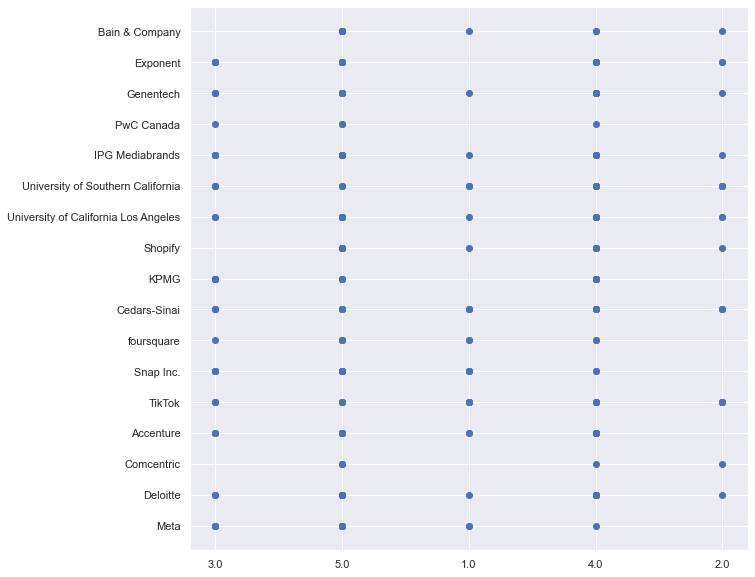

In [164]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
rating=[]
company=[]
for d in df['ratings']:
    rating.append(d)
for e in df['company']:
    company.append(e)
sns.set(color_codes=True)
plt.scatter(rating[1:300],company[1:300])
plt.show()

In [165]:
count=df['company'].value_counts()
count

Bain & Company                                    21
Humana                                            21
Accenture                                         21
Cardinal Health                                   21
Kroger                                            21
Kaiser Permanente                                 21
Genentech                                         21
Fox Corporation                                   21
Safeway                                           21
Albertsons                                        21
Publix                                            21
Brookshire Grocery Company                        21
Meta                                              21
Hy-Vee, Inc.                                      21
Ridley's Family Markets                           21
Cedars-Sinai                                      21
Neustar                                           21
Creative Artists Agency                           21
Deloitte                                      

Text(0, 0.5, 'Count of Positions of specific field')

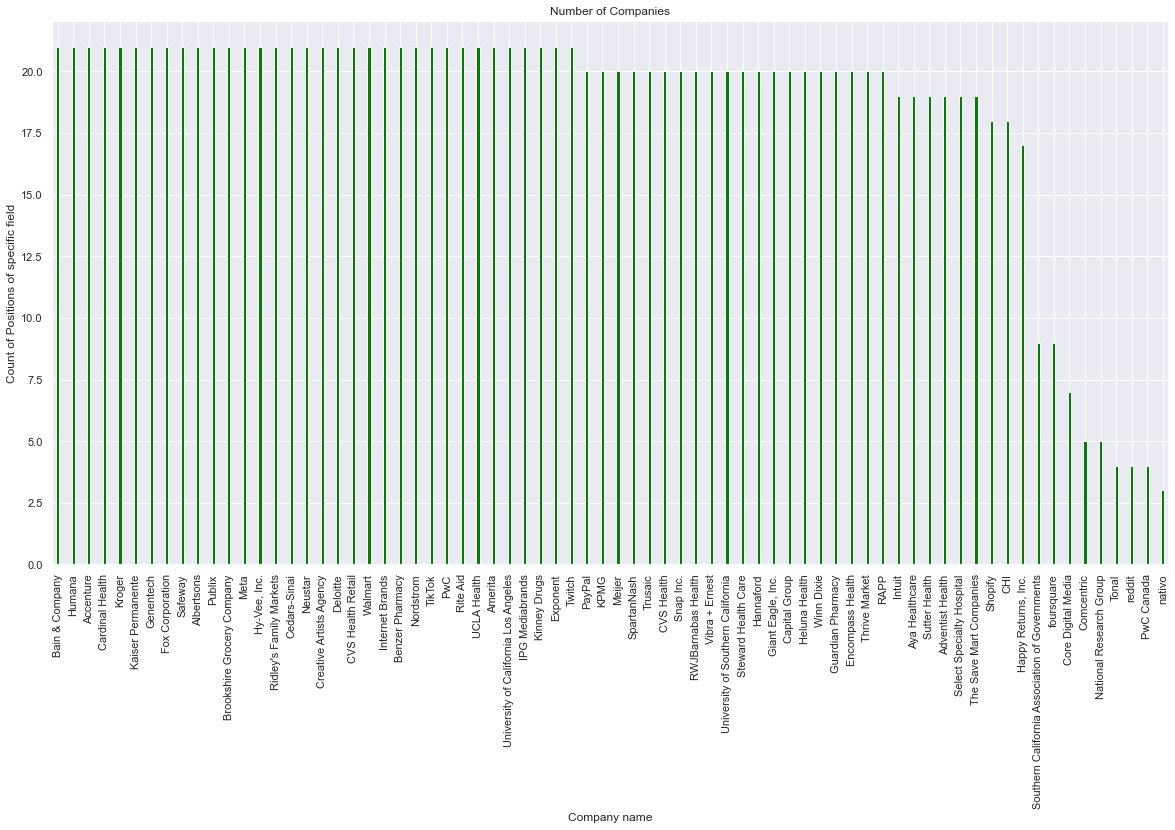

In [166]:
count.plot(kind='bar',title='Number of Companies', figsize=(20,10), width = 0.2,color='green')
plt.xlabel('Company name')
plt.ylabel('Count of Positions of specific field')

In [167]:
comfort=[]
for ele in df['ratings']:
    if float(ele)>3:
        comfort.append("Satisfied")
    elif float(ele)>1:
        comfort.append('Neutral')
    else:
        comfort.append('Dissatisfied')
df['Comfort']=comfort
df

Unnamed: 0                                         company  \
0              1                                            Meta   
1              2                                            Meta   
2              3                                            Meta   
3              4                                            Meta   
4              5                                            Meta   
5              6                                            Meta   
6              7                                            Meta   
7              8                                            Meta   
8              9                                            Meta   
9             10                                            Meta   
10            11                                            Meta   
11            12                                            Meta   
12            13                                            Meta   
13            14                                            Meta   
14            15                                            Meta   
15            16                                            Meta   
16            17                                            Meta   
17            18                                            Meta   
18            19                                            Meta   
19            20                                            Meta   
20            21                                            Meta   
21            22                                        Deloitte   
22            23                                        Deloitte   
23            24                                        Deloitte   
24            25                                        Deloitte   
25            26                                        Deloitte   
26            27                                        Deloitte   
27            28                                        Deloitte   
28            29                                        Deloitte   
29            30                                        Deloitte   
30            31                                        Deloitte   
31            32                                        Deloitte   
32            33                                        Deloitte   
33            34                                        Deloitte   
34            35                                        Deloitte   
35            36                                        Deloitte   
36            37                                        Deloitte   
37            38                                        Deloitte   
38            39                                        Deloitte   
39            40                                        Deloitte   
40            41                                        Deloitte   
41            42                                        Deloitte   
42            43                                      Comcentric   
43            44                                      Comcentric   
44            45                                      Comcentric   
45            46                                      Comcentric   
46            47                                      Comcentric   
47            48                                       Accenture   
48            49                                       Accenture   
49            50                                       Accenture   
50            51                                       Accenture   
51            52                                       Accenture   
52            53                                       Accenture   
53            54                                       Accenture   
54            55                                       Accenture   
55            56                                       Accenture   
56            57                                       Accenture   
57            58                                       Accentu

In [168]:
train1=df['Comfort'].value_counts()
train1

Satisfied       667
Neutral         435
Dissatisfied    229
Name: Comfort, dtype: int64

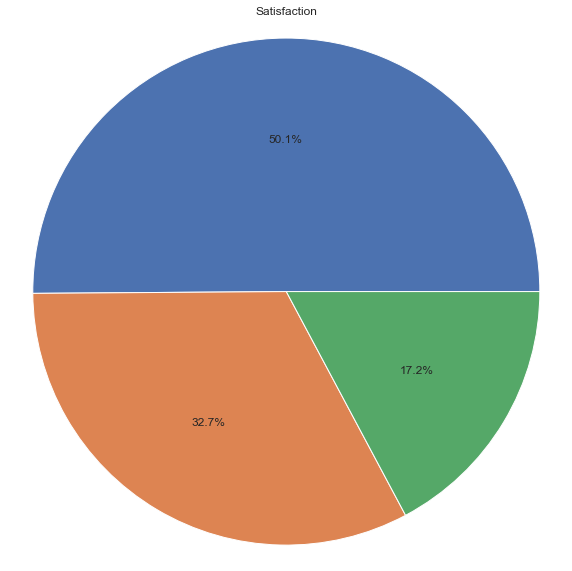

In [169]:
plt.pie(train1,autopct='%1.1f%%')
plt.title('Satisfaction')
plt.axis('equal')
plt.show()

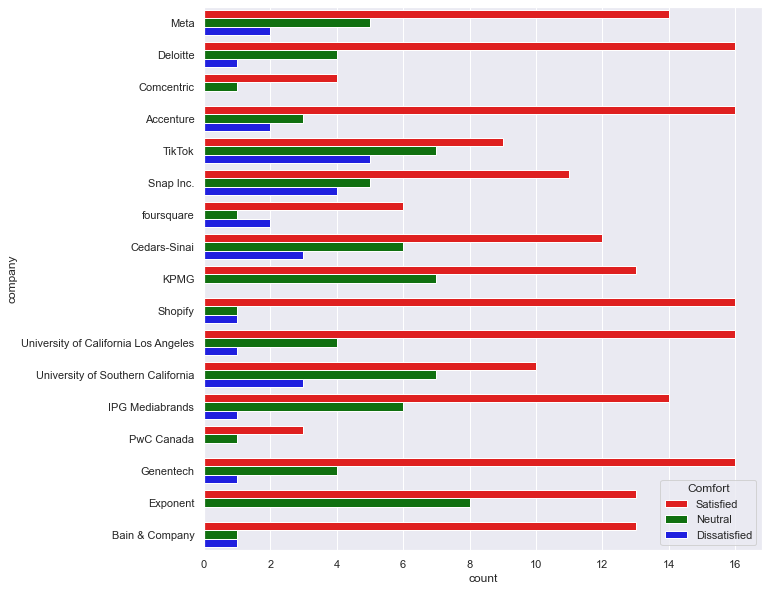

In [170]:
main_df=df[0:300]


import seaborn as sns
with sns.axes_style(style='whitegrid'):
    sns.set(rc = {'figure.figsize':(10,10)})
    g = sns.countplot(y=main_df['company'],hue=main_df["Comfort"],
                data=main_df,palette=['Red', 'Green','Blue'])

In [171]:
state = df.groupby(['Place']).count().company #group by states
pd.set_option('display.max_rows', None)
test1 = pd.DataFrame(state)
test1

company
Place                                                 
 10301 SR.37 Hwy.                                    1
 12677 Buck Rd Middlesex Nc 27557                    1
 200 N Greensboro St, Carrboro, NC 27510             1
 2100 W Swann Avenue                                 1
 3130 W. Carefree Hwy, Phoenix, Az.                  1
 3200 S Santa Fe Ave                                 1
 33 rd street                                        1
 355 Grand Street, Jersey City, N.J. 07302           1
 405 Lexington Avenue, New York, NY 10174            1
 5780 W Jefferson Blvd Los Angeles, CA 90016         1
 672 s la Lafayette park place                       1
 AZ and LA                                           1
 Abilene, TX                                         1
 Adventist Roseville                                 1
 Agoura Hills, CA                                    1
 Albuquerque, NM                                     1
 Alexandria, VA                                      2
 Allendale, MI                                       1
 Alma, GA                                            1
 Alpena, MI                                          1
 Altamonte Springs, FL                               1
 Altoona, IA                                         1
 Altoona, PA                                         1
 Anaheim, CA                                         1
 Antioch, CA                                         1
 Arizona                                             1
 Arlington, TX                                       1
 Arlington, VA                                       3
 At home                                             1
 Athens, GA                                          1
 Atlanta, GA                                         9
 Auburn, WA                                          1
 Auburndale, FL                                      2
 Augusta, ME                                         1
 Austin, TX                                          5
 Aventura, FL                                        1
 Bakersfield, CA                                     2
 Baldwin, NY                                         1
 Baltimore, MD                                       2
 Barcelona Point, NY                                 1
 Barefoot Bay Florida                                1
 Bartlett, TN                                        2
 Batesville, IN                                      6
 Battle Creek, MI                                    1
 Bay Shore, NY                                       1
 Beckley, WV                                         1
 Bedford Heights, OH                                 1
 Bedford, OH                                         1
 Bellevue, WA                                        1
 Bellflower, CA                                      1
 Bengal, OK                                          1
 Bergen, NJ                                          1
 Berkeley, CA                                        1
 Beverly Hills, CA                                   2
 Blackfoot, ID                                       1
 Blandon, PA                                        12
 Bloomfield, NJ                                      1
 Boardman, OH                                        2
 Boise, ID                                           1
 Bonita Springs, FL                                  1
 Boston, MA                                          6
 Bozeman, MT                                         1
 Bremerton, WA                                       1
 Brewer, ME                                          1
 Bridgton, ME                                        1
 Brooklyn, NY                                        4
 Brooksville, FL                                     2
 Broomfield, CO                                      1
 Brunswick, ME                                       2
 Brussels, IL                                        1
 Buffalo, NY                                         1
 Buhl, ID                       

In [172]:
ratings = main_df.groupby("ratings").count().company #group by states
pd.set_option('display.max_rows', None)
test2 = pd.DataFrame(ratings)
test2

company
ratings         
1.0           27
2.0           21
3.0           50
4.0           82
5.0          120

In [173]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
nltk.download('punkt')

import re #regex
from textblob import TextBlob #sentimate analysis
from textblob import Word
from nltk.probability import FreqDist

[nltk_data] Downloading package stopwords to C:\Users\SAHIL
[nltk_data]     MODY\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\SAHIL
[nltk_data]     MODY\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [174]:
#function to get rid of hashtags, @, and other special characters in the tweets
def review_cleaning(review):
    review = review.lower()
    to_remove = r'\d+|http?\S+|[^A-Za-z0-9]+'
    review = re.sub(to_remove, ' ', review) 
    
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(review)

    filtered = []
    for w in word_tokens:
        if w not in stop_words:
            filtered.append(w)
    
    return filtered

#sample to demonstrate the function 
sample = "This is is is a sample sentence to test if stop words works"
review_cleaning(sample)

['sample', 'sentence', 'test', 'stop', 'words', 'works']

In [175]:
df1=df.copy()
df1

Unnamed: 0                                         company  \
0              1                                            Meta   
1              2                                            Meta   
2              3                                            Meta   
3              4                                            Meta   
4              5                                            Meta   
5              6                                            Meta   
6              7                                            Meta   
7              8                                            Meta   
8              9                                            Meta   
9             10                                            Meta   
10            11                                            Meta   
11            12                                            Meta   
12            13                                            Meta   
13            14                                            Meta   
14            15                                            Meta   
15            16                                            Meta   
16            17                                            Meta   
17            18                                            Meta   
18            19                                            Meta   
19            20                                            Meta   
20            21                                            Meta   
21            22                                        Deloitte   
22            23                                        Deloitte   
23            24                                        Deloitte   
24            25                                        Deloitte   
25            26                                        Deloitte   
26            27                                        Deloitte   
27            28                                        Deloitte   
28            29                                        Deloitte   
29            30                                        Deloitte   
30            31                                        Deloitte   
31            32                                        Deloitte   
32            33                                        Deloitte   
33            34                                        Deloitte   
34            35                                        Deloitte   
35            36                                        Deloitte   
36            37                                        Deloitte   
37            38                                        Deloitte   
38            39                                        Deloitte   
39            40                                        Deloitte   
40            41                                        Deloitte   
41            42                                        Deloitte   
42            43                                      Comcentric   
43            44                                      Comcentric   
44            45                                      Comcentric   
45            46                                      Comcentric   
46            47                                      Comcentric   
47            48                                       Accenture   
48            49                                       Accenture   
49            50                                       Accenture   
50            51                                       Accenture   
51            52                                       Accenture   
52            53                                       Accenture   
53            54                                       Accenture   
54            55                                       Accenture   
55            56                                       Accenture   
56            57                                       Accenture   
57            58                                       Accentu

In [176]:
company_review = df1['review'].apply(lambda x: review_cleaning(x))

In [177]:
company_review.head()

0    [working, facebook, exposes, problems, seldom,...
1    [joined, company, since, enjoyed, many, benefi...
2    [great, looking, big, tech, job, less, great, ...
3    [great, company, work, pretty, good, work, lif...
4    [meta, previously, facebook, years, overall, l...
Name: review, dtype: object

In [178]:
#functions that will assist in the sentiment analysis
def subjectivity(review):
    return TextBlob(review).sentiment.subjectivity
def polarity(review):
    return TextBlob(review).sentiment.polarity
def conclusion(val):
    if val<0:
        return 'negative'
    elif val==0:
        return 'neutral'
    else:
        return 'positive'

In [179]:
subjectivity_col = df1['review'].apply(subjectivity)
polarity_col = df1['review'].apply(polarity)
analysis_col = polarity_col.apply(conclusion)

df2 = {'Review': df1['review'], 'Subjectivity': subjectivity_col, 'Polarity': polarity_col, 'Sentiment': analysis_col}
sentiment_analysis = pd.DataFrame(df2)
sentiment_analysis

Review  Subjectivity  \
0     Working at Facebook exposes you to problems se...      0.665344   
1     I have joined the company since 2018 and enjoy...      0.472222   
2     Great if you're looking for a big tech job, le...      0.347619   
3     It is a great company to work for. I had a pre...      0.784694   
4     I’ve been at Meta (previously Facebook) for a ...      0.367899   
5     I am in a non-tech role at Meta. It is excitin...      0.636019   
6     I learned a lot working at Meta (now Facebook)...      0.516667   
7     love it here. working on interesting things. L...      0.700000   
8     Standard 401K benefits. I believe it was a 50/...      0.200000   
9     Love educating customers in store wish we coul...      0.419048   
10    Minuses:- Manager who micromanages work produc...      0.475000   
11    What you would expect from a large company. Th...      0.669643   
12    Facebook will end the world. We’re doomed. I d...      0.750000   
13    Facebook was a great fit for me I simply wante...      0.517857   
14    A lot of workGood pay Smart people - so smart ...      0.761905   
15    Do you believe in their mission and the direct...      0.400000   
16    A lot of benefits and the salary is good. It i...      0.691667   
17    Fun place to work, good pay, contractors get t...      0.543056   
18    I love working here. It has changed my life an...      0.425000   
19    people work with are smart and helpful. Job is...      0.534524   
20    very clear annd honest company. it is vert eas...      0.746333   
21    I have come across the most hard working and k...      0.594983   
22    Great compensation. The USDC office has built ...      0.500000   
23    Deloitte is a nice place to start and build a ...      0.850000   
24    I work in China mainland office, and its duty ...      0.425000   
25    You drown or swim type of learning experience....      0.711667   
26    Lot of overtime and unrecognised for part of t...      0.500000   
27    Assigned to job, work with new ppl all the tim...      0.427706   
28    Solid company. Amazing, talented people. DEI. ...      0.577083   
29    Lots of long term employee, stable company, pa...      0.600000   
30    Not a bad place to start a career (or jump sta...      0.488889   
31    I would give an over all rating for this compa...      0.450000   
32    Fast paced environment, beautiful offices, gre...      0.698333   
33    Pros*Good pay, benefits and hours for gov. con...      0.474702   
34    There ARE some good people here, but by and la...      0.485714   
35    Great benefits they truly do care about their ...      0.450000   
36    Wonder full job love going there everyday and ...      0.600000   
37    a lot of resources at disposal for skilling up...      0.800000   
38    It all depends on which path you take, either ...      0.580556   
39    Excelente equipo y excelente sueldo. Buen ambi...      0.000000   
40    Good place to work career growth and opportuni...      0.600000   
41    Deloitte is a strong global company that does ...      0.596667   
42    It was a great place to work. Friendly environ...      0.516667   
43    Quick turnaround with clean background. Offers...      0.540000   
44    They were very good as an employer and I would...      0.541000   
45    The employees are nice people, but the owner i...      0.511905   
46    I must admit that i do not like working as a c...      1.000000   
47    Fun, good professional development, offers a l...      0.180000   
48    Great company and culture. Compensation could ...      0.625000   
49    As I have started with Accenture, it offered m...      0.594444   
50    One great thing about Accenture Technology Cen...      0.486364   
51    Accenture is a very big company and you will l...      0.292273   
52    Great for the name but not much else. As a sof...      0.592308   
53    I enjoyed my time working there. Great benefit...      0.675000   
54    Very demanding, high pressur

In [182]:
df["Sentiment"]=analysis_col
df

Unnamed: 0                                         company  \
0              1                                            Meta   
1              2                                            Meta   
2              3                                            Meta   
3              4                                            Meta   
4              5                                            Meta   
5              6                                            Meta   
6              7                                            Meta   
7              8                                            Meta   
8              9                                            Meta   
9             10                                            Meta   
10            11                                            Meta   
11            12                                            Meta   
12            13                                            Meta   
13            14                                            Meta   
14            15                                            Meta   
15            16                                            Meta   
16            17                                            Meta   
17            18                                            Meta   
18            19                                            Meta   
19            20                                            Meta   
20            21                                            Meta   
21            22                                        Deloitte   
22            23                                        Deloitte   
23            24                                        Deloitte   
24            25                                        Deloitte   
25            26                                        Deloitte   
26            27                                        Deloitte   
27            28                                        Deloitte   
28            29                                        Deloitte   
29            30                                        Deloitte   
30            31                                        Deloitte   
31            32                                        Deloitte   
32            33                                        Deloitte   
33            34                                        Deloitte   
34            35                                        Deloitte   
35            36                                        Deloitte   
36            37                                        Deloitte   
37            38                                        Deloitte   
38            39                                        Deloitte   
39            40                                        Deloitte   
40            41                                        Deloitte   
41            42                                        Deloitte   
42            43                                      Comcentric   
43            44                                      Comcentric   
44            45                                      Comcentric   
45            46                                      Comcentric   
46            47                                      Comcentric   
47            48                                       Accenture   
48            49                                       Accenture   
49            50                                       Accenture   
50            51                                       Accenture   
51            52                                       Accenture   
52            53                                       Accenture   
53            54                                       Accenture   
54            55                                       Accenture   
55            56                                       Accenture   
56            57                                       Accenture   
57            58                                       Accentu

In [184]:
neg_num = sentiment_analysis[sentiment_analysis['Sentiment']=='negative'].Sentiment.count()
neu_num = sentiment_analysis[sentiment_analysis['Sentiment']=='neutral'].Sentiment.count()
pos_num = sentiment_analysis[sentiment_analysis['Sentiment']=='positive'].Sentiment.count()

print('Sentiment Breakdown: Company Reviews')
print('Negative Reviews: ', neg_num)
print('Neutral Reviews: ', neu_num)
print('Positive Reviews: ', pos_num)

Sentiment Breakdown: Company Reviews
Negative Reviews:  250
Neutral Reviews:  41
Positive Reviews:  1040


In [244]:
#Feature extraction, model selection and model training library
from sklearn.feature_extraction.text import HashingVectorizer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split

#Libraries to check the model performance
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [261]:
# import statsmodels.api as sm
# # from metrics import DistanceMetric as _DistanceMetric
# from imblearn.over_sampling import SMOTE

In [273]:
# def train_model(train_data, targets):
# #     sm = SMOTE()
# #     X_s, y_s= sm.fit_resample(train_data, targets)
#     X_train, X_test, Y_train, Y_test = train_test_split(train_data, targets, test_size=0.2)

#     model = Pipeline([('vect', HashingVectorizer()),
#                       ('logreg', LogisticRegression(max_iter=1000, solver="saga")),
#               ])
#     model.fit(X_train, Y_train)

#     return model, X_test, Y_test

In [368]:
train_data = df['review']
targets = df['Sentiment']
X_train, X_test, Y_train, Y_test = train_test_split(train_data, targets, test_size=0.3)

In [369]:
model = Pipeline([('vect', HashingVectorizer()),
                  ('logreg', LogisticRegression(max_iter=1000, solver="saga"))
                   ])
model.fit(X_train, Y_train)                      

Pipeline(steps=[('vect', HashingVectorizer()),
                ('logreg', LogisticRegression(max_iter=1000, solver='saga'))])

In [370]:
def check_model_metrics(model, test_data, test_targets):
    y_pred = model.predict(test_data)

    print("ACCURACY:")
    print(metrics.accuracy_score(test_targets, y_pred)*100)

    print("\nCONFUSSION MATRIX")
    print(confusion_matrix(test_targets, y_pred))

    print("\nCLASSIFICATION REPORT")
    print(classification_report(test_targets, y_pred))

In [275]:
# train_data = df['review']


In [276]:
# targets=df['Sentiment']

In [277]:
# model, x_test, y_test = train_model(train_data, targets)

In [371]:
check_model_metrics(model, X_test, Y_test)

ACCURACY:
80.0

CONFUSSION MATRIX
[[  8   0  66]
 [  2   0   9]
 [  3   0 312]]

CLASSIFICATION REPORT
              precision    recall  f1-score   support

    negative       0.62      0.11      0.18        74
     neutral       0.00      0.00      0.00        11
    positive       0.81      0.99      0.89       315

    accuracy                           0.80       400
   macro avg       0.47      0.37      0.36       400
weighted avg       0.75      0.80      0.73       400



C:\Users\SAHIL MODY\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  -------


In [372]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer

In [373]:

def normalize_numbers(s):
    return re.sub(r'\b\d+\b', 'NUM', s)

cv = CountVectorizer(preprocessor=normalize_numbers, ngram_range=(1,3), stop_words='english')

In [374]:
X_train_counts = cv.fit_transform(X_train)
X_test_counts = cv.transform(X_test)

In [375]:
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
clf = MultinomialNB().fit(X_train_counts, Y_train)
predicted = clf.predict(X_test_counts)

In [376]:
# print(pd.DataFrame({"Actual":y_test,"Predicted":predicted}))
print(metrics.classification_report(Y_test, predicted))

              precision    recall  f1-score   support

    negative       1.00      0.03      0.05        74
     neutral       0.00      0.00      0.00        11
    positive       0.79      1.00      0.88       315

    accuracy                           0.79       400
   macro avg       0.60      0.34      0.31       400
weighted avg       0.81      0.79      0.71       400



C:\Users\SAHIL MODY\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  -------


In [288]:
from wordcloud import WordCloud

Text(0.5, 1.0, 'Trump Tweets Word Cloud')

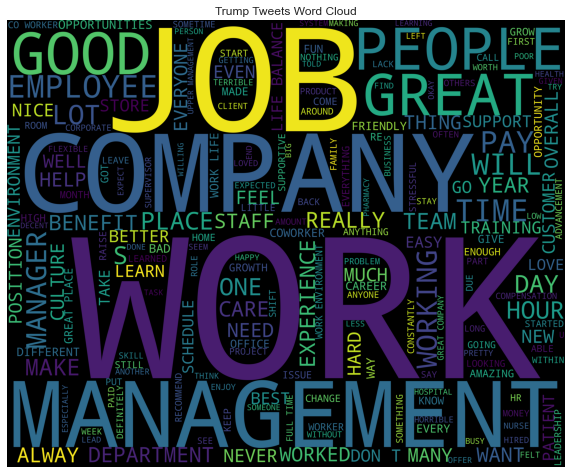

In [378]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)
wordcloud = WordCloud(width=5000, height=4000,stopwords=stopwords,random_state = 2016).generate(" ".join([i for i in df['review'].str.upper()]))
plt.imshow(wordcloud)
plt.axis("off")
plt.title("Company Reviews Word Cloud")

In [382]:
# # Classifier - Algorithm - SVM
# # fit the training dataset on the classifier
# from sklearn import model_selection, svm
# SVM = svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto')
# SVM.fit(X_train,Y_train)
# # predict the labels on validation dataset
# predictions_SVM = SVM.predict(X_test)
# # Use accuracy_score function to get the accuracy
# print("SVM Accuracy Score -> ",accuracy_score(predictions_SVM, Y_test)*100)
